# Auto Encoder

In [198]:
from keras.layers import Input, Dense
from keras.models import Model

In [199]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

In [200]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [201]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [202]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [203]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() #grid에 흑백의 진하기 정도에 대한 값 + label

In [204]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Hidden Layer Units = 32

In [205]:
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s - loss: 0.3691 - val_loss: 0.2724
Epoch 2/20
60000/60000 [==============================] - 6s - loss: 0.2652 - val_loss: 0.2545
Epoch 3/20
60000/60000 [==============================] - 5s - loss: 0.2441 - val_loss: 0.2312
Epoch 4/20
60000/60000 [==============================] - 6s - loss: 0.2231 - val_loss: 0.2127
Epoch 5/20
60000/60000 [==============================] - 5s - loss: 0.2075 - val_loss: 0.1996
Epoch 6/20
60000/60000 [==============================] - 5s - loss: 0.1961 - val_loss: 0.1899
Epoch 7/20
60000/60000 [==============================] - 5s - loss: 0.1876 - val_loss: 0.1823
Epoch 8/20
60000/60000 [==============================] - 5s - loss: 0.1806 - val_loss: 0.1759
Epoch 9/20
60000/60000 [==============================] - 6s - loss: 0.1746 - val_loss: 0.1703
Epoch 10/20
60000/60000 [==============================] - 5s - loss: 0.1693 - val_loss: 0.1653

## Original Images & reconstructed Images

In [206]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

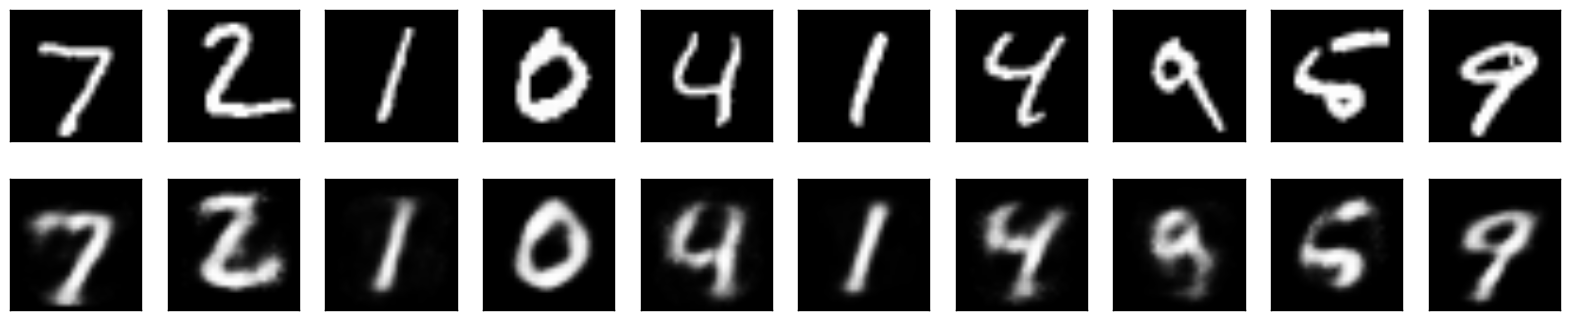

In [207]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Encoded Images

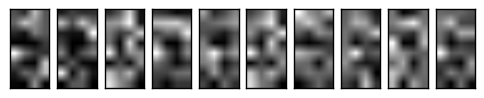

In [220]:
for i in range(10):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Hidden Layer Units = 784

In [163]:
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s - loss: 0.3087 - val_loss: 0.2382
Epoch 2/20
60000/60000 [==============================] - 22s - loss: 0.2191 - val_loss: 0.2003
Epoch 3/20
60000/60000 [==============================] - 24s - loss: 0.1902 - val_loss: 0.1786
Epoch 4/20
60000/60000 [==============================] - 22s - loss: 0.1726 - val_loss: 0.1643
Epoch 5/20
60000/60000 [==============================] - 22s - loss: 0.1603 - val_loss: 0.1539
Epoch 6/20
60000/60000 [==============================] - 22s - loss: 0.1510 - val_loss: 0.1455
Epoch 7/20
60000/60000 [==============================] - 23s - loss: 0.1434 - val_loss: 0.1387
Epoch 8/20
60000/60000 [==============================] - 24s - loss: 0.1371 - val_loss: 0.1329
Epoch 9/20
60000/60000 [==============================] - 23s - loss: 0.1317 - val_loss: 0.1279
Epoch 10/20
60000/60000 [==============================] - 23s - loss: 0.1270 - val_lo

In [164]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

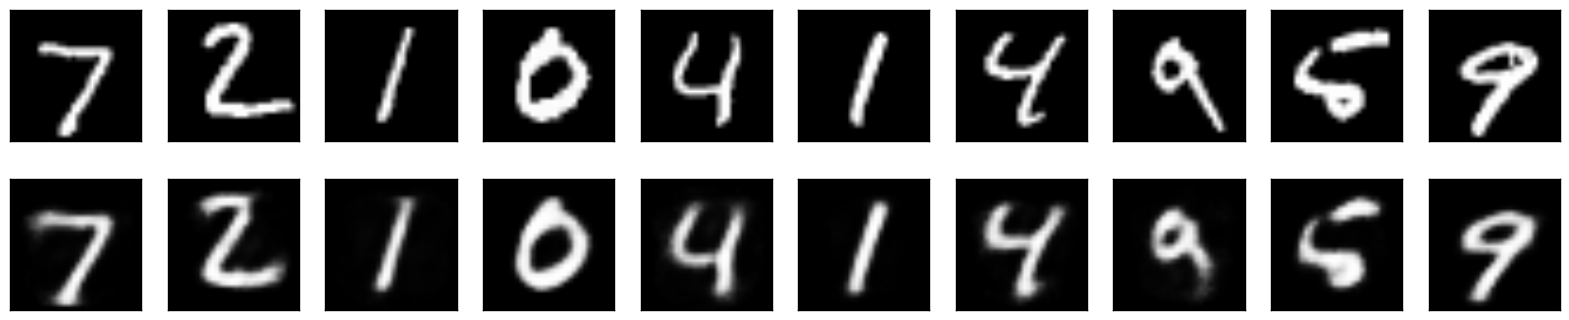

In [165]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Hidden Layer Units = 2048

In [193]:
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 57s - loss: 0.2953 - val_loss: 0.2267
Epoch 2/20
60000/60000 [==============================] - 55s - loss: 0.2076 - val_loss: 0.1893
Epoch 3/20
60000/60000 [==============================] - 57s - loss: 0.1797 - val_loss: 0.1687
Epoch 4/20
60000/60000 [==============================] - 59s - loss: 0.1629 - val_loss: 0.1549
Epoch 5/20
60000/60000 [==============================] - 51s - loss: 0.1512 - val_loss: 0.1449
Epoch 6/20
60000/60000 [==============================] - 52s - loss: 0.1422 - val_loss: 0.1369
Epoch 7/20
60000/60000 [==============================] - 50s - loss: 0.1350 - val_loss: 0.1306
Epoch 8/20
60000/60000 [==============================] - 48s - loss: 0.1291 - val_loss: 0.1250
Epoch 9/20
60000/60000 [==============================] - 48s - loss: 0.1240 - val_loss: 0.1203
Epoch 10/20
60000/60000 [==============================] - 54s - loss: 0.1196 - val_lo

In [194]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

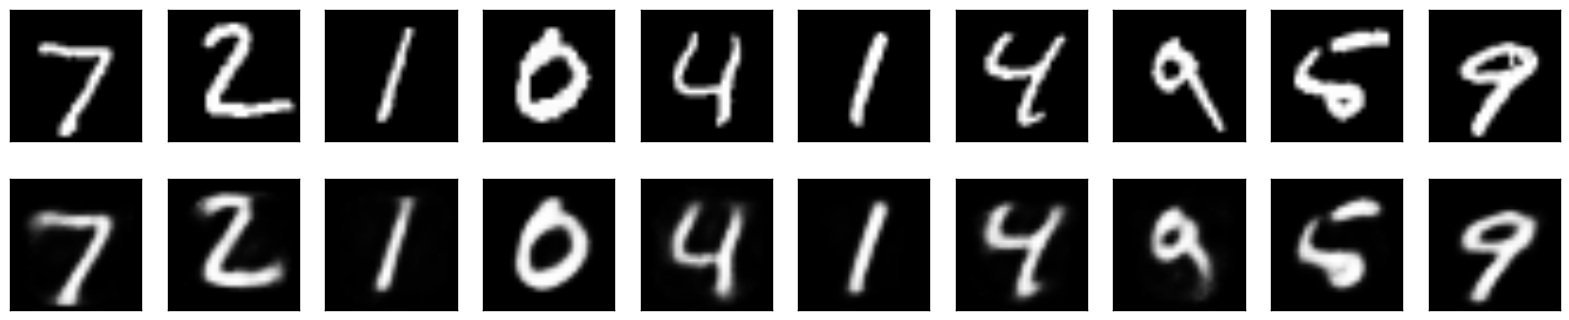

In [195]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()